In [1]:
#Murat Şahin 2024-Ağustos saatlik toplu taşıma ulaşım verisi analizi ve makine öğrenmesi modellemesi çalışmasıdır.

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hourly-public-transport-ridership-data-in-istanbul/hourly_transportation_202402.csv


In [1]:
# CSV dosyasının tam yolunu kullanın
file_path = '/kaggle/input/hourly-public-transport-ridership-data-in-istanbul/hourly_transportation_202402.csv'

# CSV dosyasını pandas ile okuyun
import pandas as pd
data = pd.read_csv(file_path)

# İlk birkaç satırı gösterin
print(data.head())


             DATE_TIME  LONGITUDE   LATITUDE GEOHASH  MINIMUM_SPEED  \

0  2024-08-01 00:00:00  28.427124  41.058655  sxk1wf             61   

1  2024-08-01 00:00:00  28.591919  41.102600  sxk3fd             33   

2  2024-08-01 00:00:00  28.339233  41.097107  sxk1uc             65   

3  2024-08-01 00:00:00  28.229370  41.130066  sxk1fr             51   

4  2024-08-01 00:00:00  28.493042  41.119080  sxk3bm             30   



   MAXIMUM_SPEED  AVERAGE_SPEED  NUMBER_OF_VEHICLES  

0            126             90                  50  

1            154             89                  58  

2            141             95                  38  

3            129             84                  38  

4            113             67                  23  


In [2]:
# Convert the DATE_TIME column to datetime format and extract useful time features
data['DATE_TIME'] = pd.to_datetime(data['DATE_TIME'])
data['hour'] = data['DATE_TIME'].dt.hour
data['day_of_week'] = data['DATE_TIME'].dt.dayofweek
data['month'] = data['DATE_TIME'].dt.month

# Drop the original DATE_TIME column as we have extracted necessary information
data = data.drop(columns=['DATE_TIME'])

# Encode the GEOHASH feature using Label Encoding for simplicity
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['GEOHASH_encoded'] = le.fit_transform(data['GEOHASH'])

# Drop the original GEOHASH column after encoding
data = data.drop(columns=['GEOHASH'])

# Display the updated dataframe to confirm preprocessing
data.head()


,LONGITUDE,LATITUDE,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,hour,day_of_week,month,GEOHASH_encoded
0,28.427124,41.058655,61,126,90,50,0,3,8,253
1,28.591919,41.102600,33,154,89,58,0,3,8,359
2,28.339233,41.097107,65,141,95,38,0,3,8,239
3,28.229370,41.130066,51,129,84,38,0,3,8,191
4,28.493042,41.119080,30,113,67,23,0,3,8,328


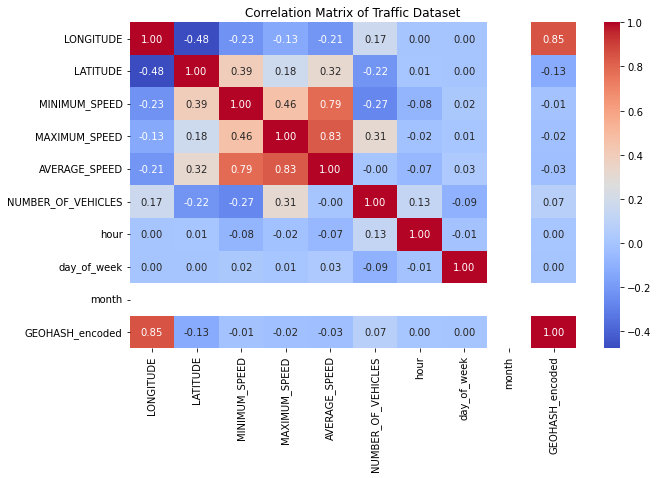

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap to observe relationships between variables
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Traffic Dataset')
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define the target and features
X = data.drop(columns=['NUMBER_OF_VEHICLES'])
y = data['NUMBER_OF_VEHICLES']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor with optimized parameters
rf_model = RandomForestRegressor(
    n_estimators=50,       # Reduced number of trees for faster training
    max_depth=10,          # Limit the depth of each tree to prevent overfitting and speed up training
    max_features='sqrt',   # Use sqrt(number of features) for each split, faster and typically still accurate
    n_jobs=-1,             # Use all available CPU cores for parallel processing
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

mae, rmse


(41.17259230469082, 71.59536373972708)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define the target and features
X = data.drop(columns=['NUMBER_OF_VEHICLES'])
y = data['NUMBER_OF_VEHICLES']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor with optimized parameters
rf_model = RandomForestRegressor(
    n_estimators=100,          # Increase the number of trees for better accuracy
    max_depth=15,              # Allow deeper trees for capturing more complex relationships
    max_features='sqrt',       # Use sqrt(number of features) for faster training and reasonable accuracy
    min_samples_split=5,       # Require at least 5 samples to split a node, avoiding overfitting
    min_samples_leaf=4,        # Require at least 4 samples per leaf to avoid overfitting
    n_jobs=-1,                 # Use all CPU cores
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

mae, rmse

(30.252942592104485, 55.056456558071766)

In [6]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100],     # Ağaç sayısını deneyin
    'max_depth': [10, 15],           # Farklı derinliklerde ağaçlar
    'min_samples_split': [2, 5],     # Dallanma için minimum örnek sayısı
    'min_samples_leaf': [1, 2],       # Yaprak düğümü için minimum örnek sayısı
    'max_features': ['sqrt', 'log2']     # Özellik seçimi
}

# Initialize Random Forest and GridSearchCV
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
print(grid_search.best_params_)


Fitting 3 folds for each of 16 candidates, totalling 48 fits

{'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define the target and features
X = data.drop(columns=['NUMBER_OF_VEHICLES'])
y = data['NUMBER_OF_VEHICLES']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor with optimized parameters
rf_model = RandomForestRegressor(
    n_estimators=100,          # Increase the number of trees for better accuracy
    max_depth=15,              # Allow deeper trees for capturing more complex relationships
    max_features='sqrt',       # Use sqrt(number of features) for faster training and reasonable accuracy
    min_samples_split=2,       # Require at least 2 samples to split a node, avoiding overfitting
    min_samples_leaf=2,        # Require at least 2 samples per leaf to avoid overfitting
    n_jobs=-1,                 # Use all CPU cores
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

mae, rmse

(30.02739278468586, 54.45470392733259)